In [1]:
from pathlib import Path
from fastai.vision.all import *

In [16]:
import requests
response = requests.get('https://raw.githubusercontent.com/mo-nathan/mo-ml/main/labels-one.txt')
taxa = response.content.decode().strip().split('\n')
taxa

['Trametes versicolor',
 'Pleurotus ostreatus',
 'Schizophyllum commune',
 'Hypholoma fasciculare',
 'Galerina marginata',
 'Lycoperdon perlatum',
 'Ganoderma applanatum',
 'Phaeolus schweinitzii',
 'Coprinus comatus',
 'Trichaptum biforme',
 'Laetiporus sulphureus']

In [3]:
MO_URL = "https://mushroomobserver.org/mo_11_100.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)
def label_func(x):
    return x.parent.name

In [4]:
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=Resize(160))
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [5]:
print(datetime.now())
learn.fine_tune(10)
print(datetime.now())

2022-07-17 20:47:46.546390


epoch,train_loss,valid_loss,error_rate,time
0,3.230607,1.405741,0.450000,01:23


epoch,train_loss,valid_loss,error_rate,time
0,1.614096,1.133917,0.359091,02:08
1,1.260501,0.889772,0.300000,02:05
2,0.957188,0.738960,0.213636,02:07
3,0.719609,0.674614,0.218182,02:06
4,0.537788,0.691027,0.222727,02:06
5,0.414402,0.691631,0.209091,02:07
6,0.322793,0.698617,0.213636,02:07
7,0.253173,0.710327,0.213636,02:05
8,0.204721,0.700846,0.209091,02:06
9,0.165161,0.692010,0.204545,02:07


2022-07-17 21:10:19.000710


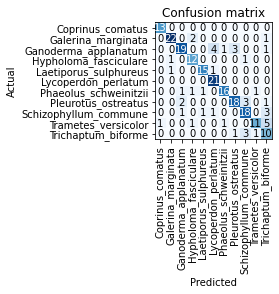

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

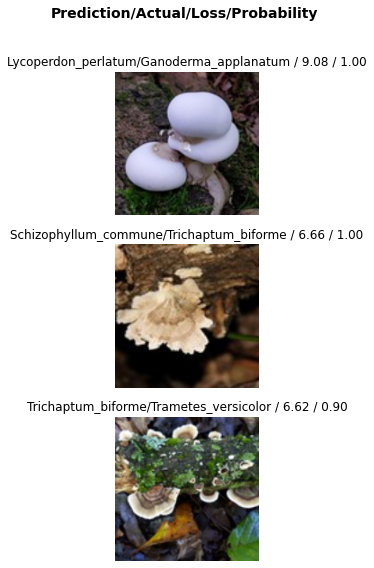

In [7]:
interp.plot_top_losses(3, nrows=3)

In [8]:
learn.save("sample-11x100-model")

Path('/Users/nathan/.fastai/data/mo_11_100/models/sample-11x100-model.pth')

In [9]:
learn_11_100 = vision_learner(dls, resnet34, metrics=error_rate)
learn_11_100.load("sample-11x100-model")

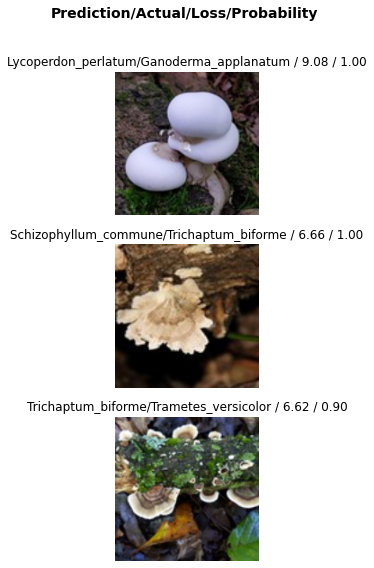

In [11]:
interp_11_100 = ClassificationInterpretation.from_learner(learn_11_100)
interp_11_100.plot_top_losses(3, nrows=3)